In [1]:
import pandas as pd
import math
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/Users/admin/miniconda3/miniconda3/envs/ml/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
!ls archive

test.csv  train.csv


In [3]:
def getPath(path):
    BASE_PATH = "archive/"
    return BASE_PATH + path

In [4]:
orig_data = pd.read_csv(getPath("train.csv"))
data = orig_data

In [5]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
def min_max_scaling(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

def reverse_min_max_scaling(scaled_value, min_value, max_value):
    return (scaled_value * (max_value - min_value)) + min_value

### Analyzing Data

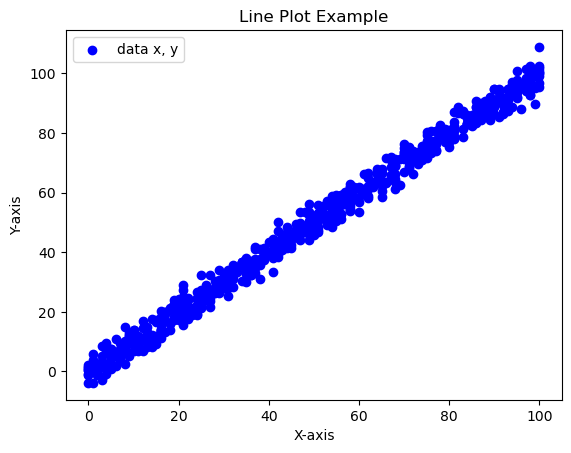

In [7]:
# Create a line plot
plt.scatter(data.x, data.y, label='data x, y', color='blue', marker='o')

# Add title and labels
plt.title('Line Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [8]:
# scaling
# data.x = np.log10(data.x)

print("|describe|", data.describe())
print("-------------Divider--------------")
print("|info|", data.info())
print("-------------Divider--------------")
print("|NULL|", data.isna().sum())

|describe|                  x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618
-------------Divider--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
|info| None
-------------Divider--------------
|NULL| x    0
y    1
dtype: int64


### Feature Engineering

In [13]:
# Drop Null Values
data = data.dropna()


In [14]:

data.x = min_max_scaling(data.x, data.x.min(), data.x.max())
data.y = min_max_scaling(data.y, data.y.min(), data.y.max())

### Train Model

##### Splitting the dataset

In [15]:
X = data.drop(columns=['y'])
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#### TODO: Test everyting below


# Predict the target variable (y) using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.006411904564544943
R-squared: 0.6507135468143403


### Evaluate

In [29]:
def evaluate():
    # global y_test
    y_pred = model.predict(X_test)
    y_test_local = y_test.to_numpy()
    
    # reverse min-max sclaing
    y_pred = reverse_min_max_scaling(y_pred, orig_data.y.min(), orig_data.y.max())
    y_test_local = reverse_min_max_scaling(y_test_local, orig_data.y.min(), orig_data.y.max())
    
    df = pd.DataFrame({ 'y_pred': y_pred, 'y_test': y_test_local, 'diff': y_pred - y_test_local  })
    
    mse = mean_squared_error(y_test_local, y_pred)
    r2 = r2_score(y_test_local, y_pred)
    
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print(df)

evaluate()

Mean Squared Error: 81.45622417321817
R-squared: 0.6507135468143403
        y_pred      y_test      diff
0    93.428758   94.328626 -0.899868
1    98.099745  103.614325 -5.514580
2    96.898860  101.890632 -4.991772
3    99.064895  105.685832 -6.620937
4    88.881211   85.993451  2.887760
..         ...         ...       ...
133  98.713059  104.973906 -6.260847
134  90.787738   91.244058 -0.456320
135  97.972761  103.740376 -5.767615
136  99.179657  106.446644 -7.266988
137  89.175203   90.446241 -1.271038

[138 rows x 3 columns]
